In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import sys
sys.path.insert(1, './utils')

import torch
print(torch.cuda.get_device_name(torch.cuda.current_device()))
print('CUDA Version ' + torch.version.cuda)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

NVIDIA GeForce RTX 2080 Ti
CUDA Version 11.3


## Load data from files

In [2]:
import dataparamsim
reload(dataparamsim)

dataDirectoryHome = '../gnnmodel'
scalingList = np.arange(10,21)/10
ieeecase = 'IEEE89'

dataParams = dataparamsim.dataParams(device, ieeecase, dataDirectoryHome, scalingList)

## Load influence model

In [3]:
import influencecascadewrapper
reload(influencecascadewrapper)

failureCascadeWrapper = influencecascadewrapper.failureCascadeWrapper(dataParams, device)
errorVectorListStatusIM, lineFailureFrequencyList = failureCascadeWrapper.collectAllProfileErrors('Test')

Scaling value = 1.0, initial contingencies matrix shape = torch.Size([1000, 206]).
Scaling value = 1.1, initial contingencies matrix shape = torch.Size([1000, 206]).
Scaling value = 1.2, initial contingencies matrix shape = torch.Size([1000, 206]).
Scaling value = 1.3, initial contingencies matrix shape = torch.Size([1000, 206]).
Scaling value = 1.4, initial contingencies matrix shape = torch.Size([1000, 206]).
Scaling value = 1.5, initial contingencies matrix shape = torch.Size([1000, 206]).
Scaling value = 1.6, initial contingencies matrix shape = torch.Size([1000, 206]).
Scaling value = 1.7, initial contingencies matrix shape = torch.Size([1000, 206]).
Scaling value = 1.8, initial contingencies matrix shape = torch.Size([1000, 206]).
Scaling value = 1.9, initial contingencies matrix shape = torch.Size([1000, 206]).
Scaling value = 2.0, initial contingencies matrix shape = torch.Size([1000, 206]).


## Plot results

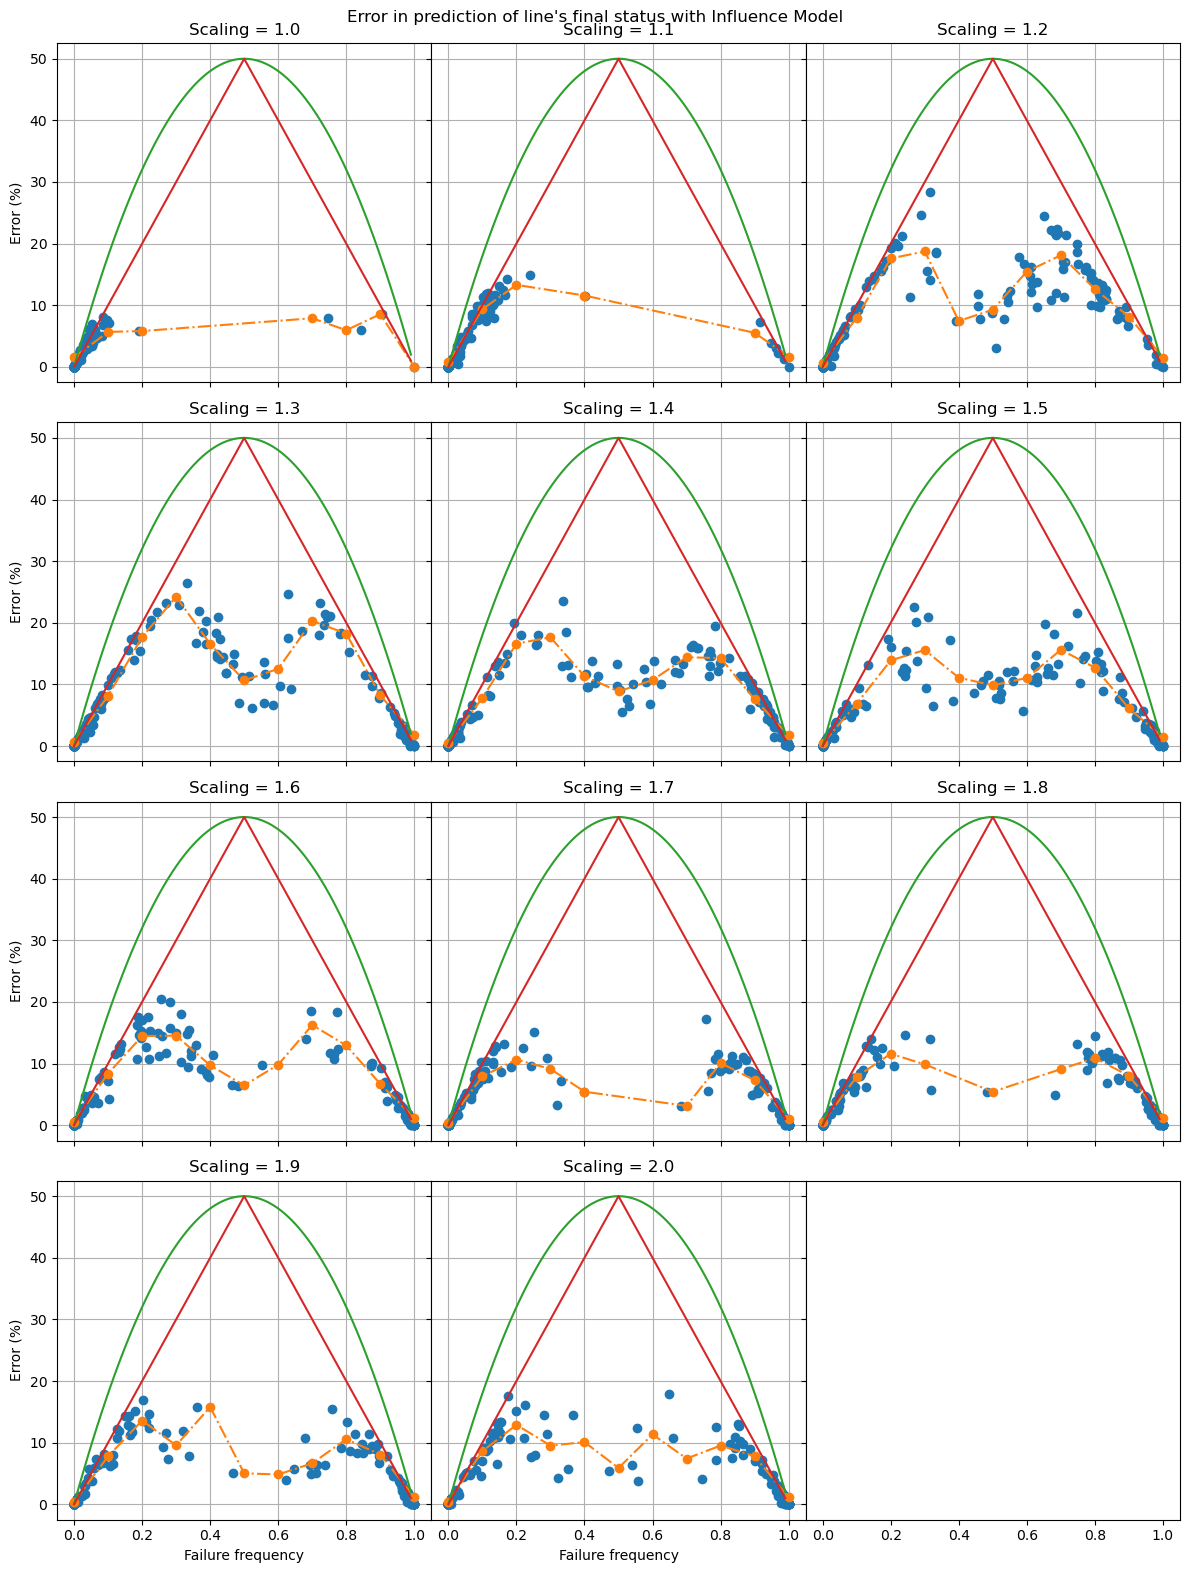

In [4]:
import plotterresults
reload(plotterresults)
resultPlotter = plotterresults.resultPlotter(dataParams.scalingList)
resultPlotter.plotFinalStateError(errorVectorListStatusIM, 4, 3, 'Status', 'Influence Model', lineFailureFrequencyList)